# Credit Card Fraud Detection - Data Exploration

This notebook explores the credit card fraud detection dataset and analyzes its characteristics.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('..')
from config.config import RAW_DATA_DIR

In [9]:
# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
warnings.filterwarnings('ignore')

# Figure settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Load the dataset

In [ ]:
# # Notebook path
# notebook_path = Path.cwd()

# # Target directory
# target_dir = 'fraud_detection_with_machine_learning'

# for parent in notebook_path.parents:
#     if parent.name == target_dir:
#         project_root = parent
#         break

# data_path = project_root / 'data/raw/creditcard.csv'

data_path = RAW_DATA_DIR / 'creditcard.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Overview and Statistics

In [22]:
# Check basic statistics and info
print("Dataset Information:")
print(f"Number of Transactions: {df.shape[0]:,.0f}")
print(f"Number of Features: {df.shape[1] - 1}")  # Excluding Class column
print(f"Missing Values: {df.isnull().sum().sum()}")

# Class distribution
fraud_count = df['Class'].sum()
normal_count = len(df) - fraud_count
fraud_percentage = (fraud_count / len(df)) * 100

print("\nClass Distribution:")
print(f"Normal Transactions: {normal_count:,.0f} ({100 - fraud_percentage:.4f}%)")
print(f"Fraudulent Transactions: {fraud_count:,.0f} ({fraud_percentage:.4f}%)")

# Display basic statistics
df.describe().T

Dataset Information:
Number of Transactions: 284,807
Number of Features: 30
Missing Values: 0

Class Distribution:
Normal Transactions: 284,315 (99.8273%)
Fraudulent Transactions: 492 (0.1727%)


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Visualizing Class Imbalance

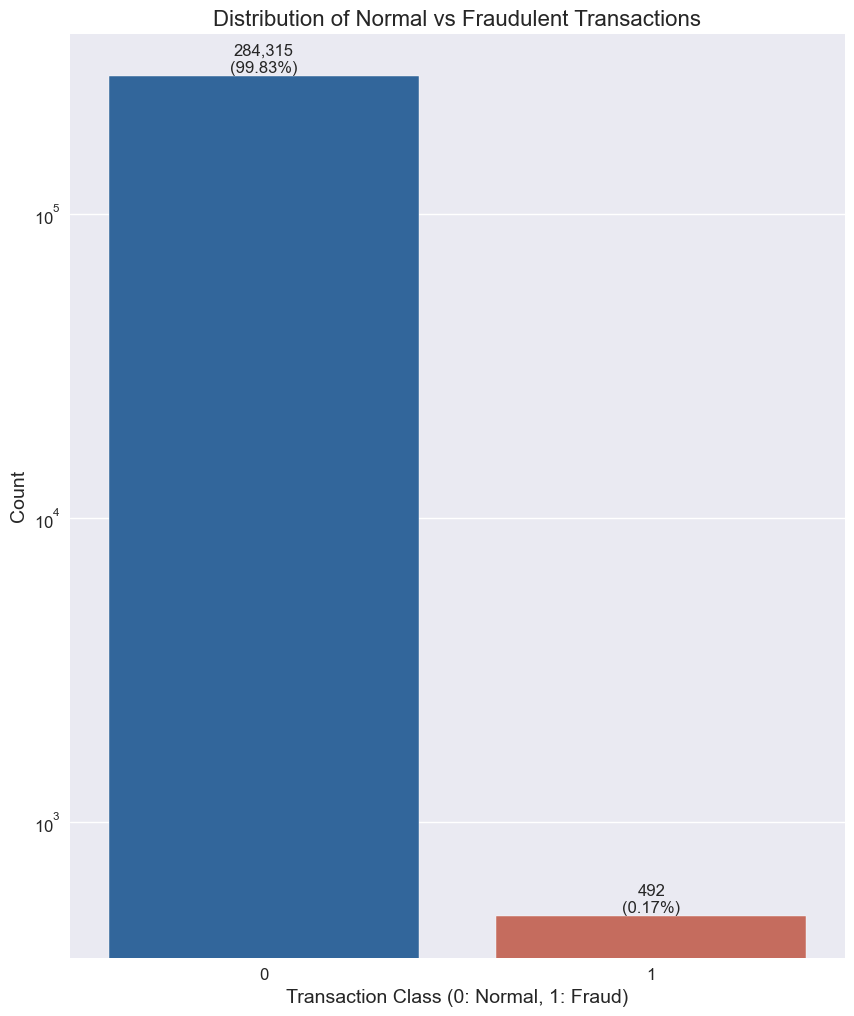

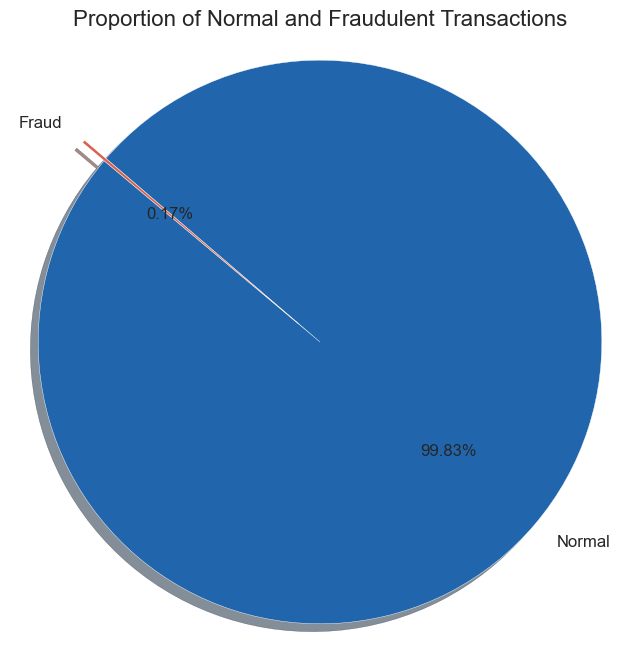

In [ ]:
# Plot class distribution
plt.figure(figsize=(10, 12))
class_counts = df['Class'].value_counts()
ax = sns.countplot(x='Class', data=df, palette=['#2166ac', '#d6604d'])

# Add count and percentage labels
for i, count in enumerate(class_counts):
    percentage = 100 * count / len(df)
    ax.annotate(f'{count:,.0f}\n({percentage:.2f}%)', 
                xy=(i, count), 
                ha='center', 
                va='bottom',
                fontsize=12)

plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.xlabel('Transaction Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.yscale('log')  # Use log scale due to extreme imbalance
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
labels = ['Normal', 'Fraud']
sizes = [normal_count, fraud_count]
colors = ['#2166ac', '#d6604d']
explode = (0, 0.1) # Offset the second wedge out of the pie by 0.1 units

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Proportion of Normal and Fraudulent Transactions')
plt.show()

## Feature Analysis

Let's analyze the features in the dataset:
1. Time and Amount distributions
2. Distribution of anonymized features (V1-V28)
3. Correlation between features

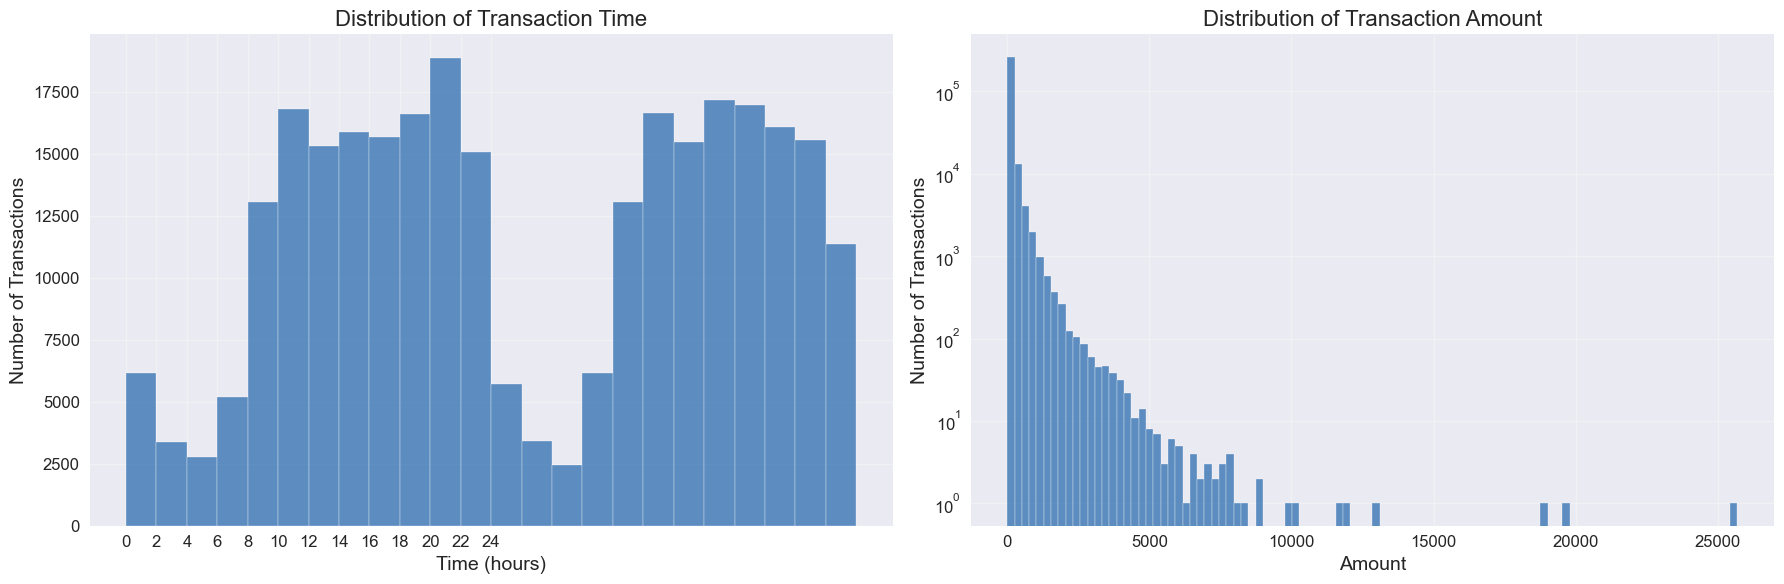

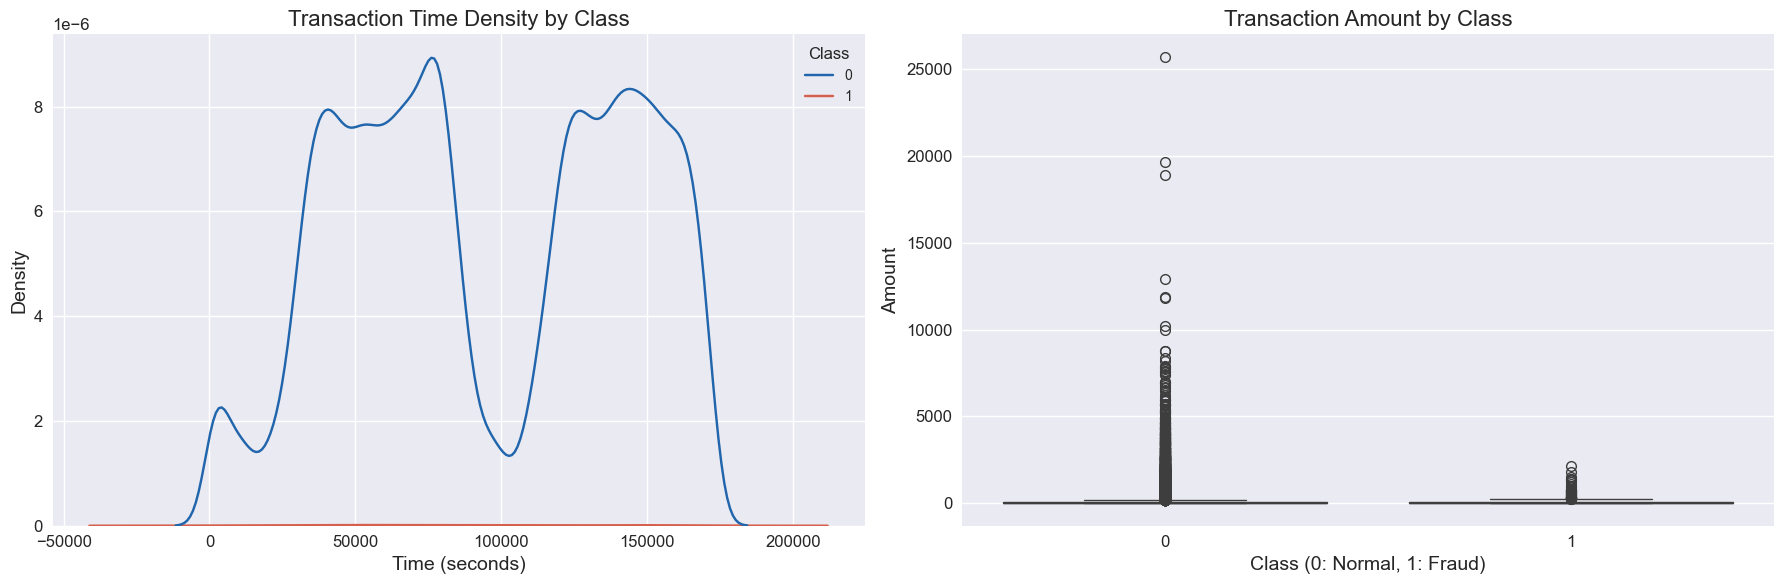

In [29]:
# Analyze Time and Amount features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Time distribution
ax1.hist(df['Time'] / 3600, bins=24, color='#2166ac', alpha=0.7)
ax1.set_title('Distribution of Transaction Time')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Number of Transactions')
ax1.set_xticks(range(0, 25, 2))
ax1.grid(True, alpha=0.3)

# Amount distribution
ax2.hist(df['Amount'], bins=100, color='#2166ac', alpha=0.7)
ax2.set_title('Distribution of Transaction Amount')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Number of Transactions')
ax2.set_yscale('log')  # Log scale to see the distribution better
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare distributions between fraudulent and normal transactions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Time comparison
sns.kdeplot(data=df, x='Time', hue='Class', ax=ax1, palette=['#2166ac', '#d6604d'])
ax1.set_title('Transaction Time Density by Class')
ax1.set_xlabel('Time (seconds)')

# Amount comparison
sns.boxplot(data=df, x='Class', y='Amount', ax=ax2, palette=['#2166ac', '#d6604d'])
ax2.set_title('Transaction Amount by Class')
ax2.set_xlabel('Class (0: Normal, 1: Fraud)')
ax2.set_ylabel('Amount')

plt.tight_layout()
plt.show()

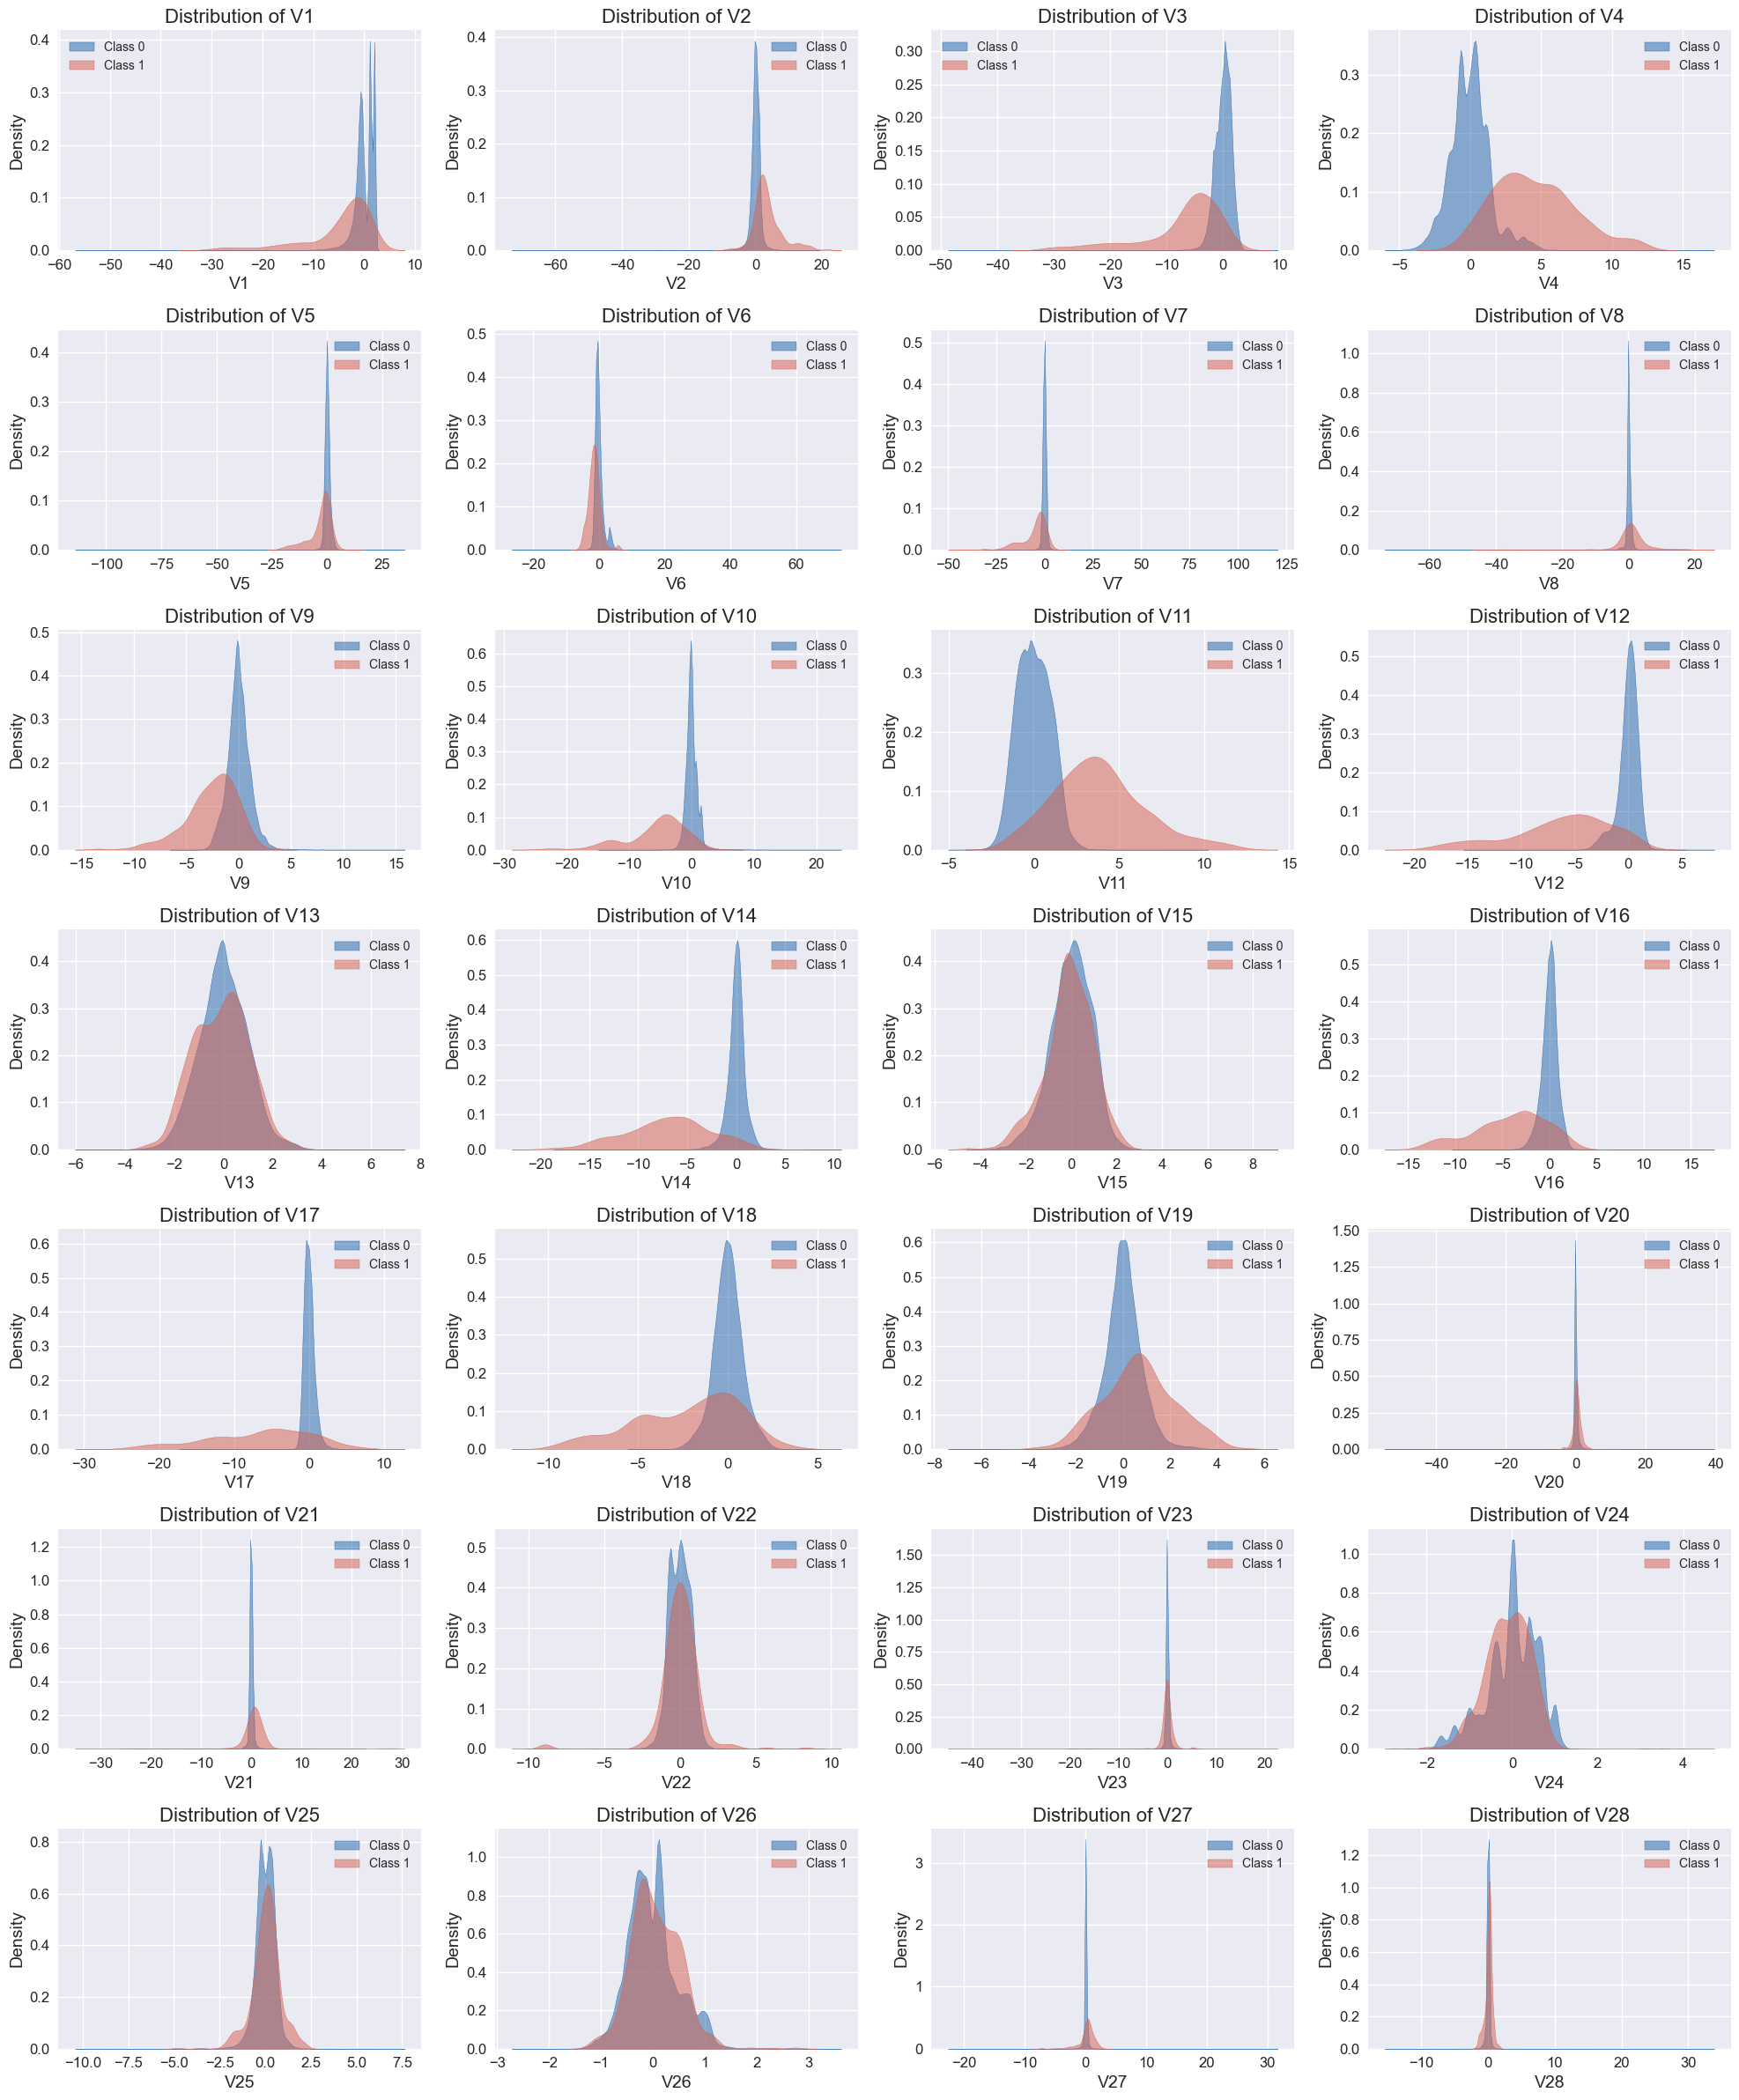

In [30]:
# Analyze the distribution of anonymized features V1-V28
# Select only the V features
v_features = [col for col in df.columns if col.startswith('V')]

# Create plots for V features distributions by class
n_cols = 4
n_rows = 7
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 24))
axes = axes.flatten()

for i, feature in enumerate(v_features):
    ax = axes[i]
    
    # Plot density distribution for each class
    for class_value, color in zip([0, 1], ['#2166ac', '#d6604d']):
        sns.kdeplot(
            df.loc[df['Class'] == class_value, feature],
            ax=ax,
            color=color,
            label=f'Class {class_value}',
            fill=True,
            alpha=0.5
        )
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlation Analysis

Let's examine the correlations between features, and identify which features are most correlated with the target variable.

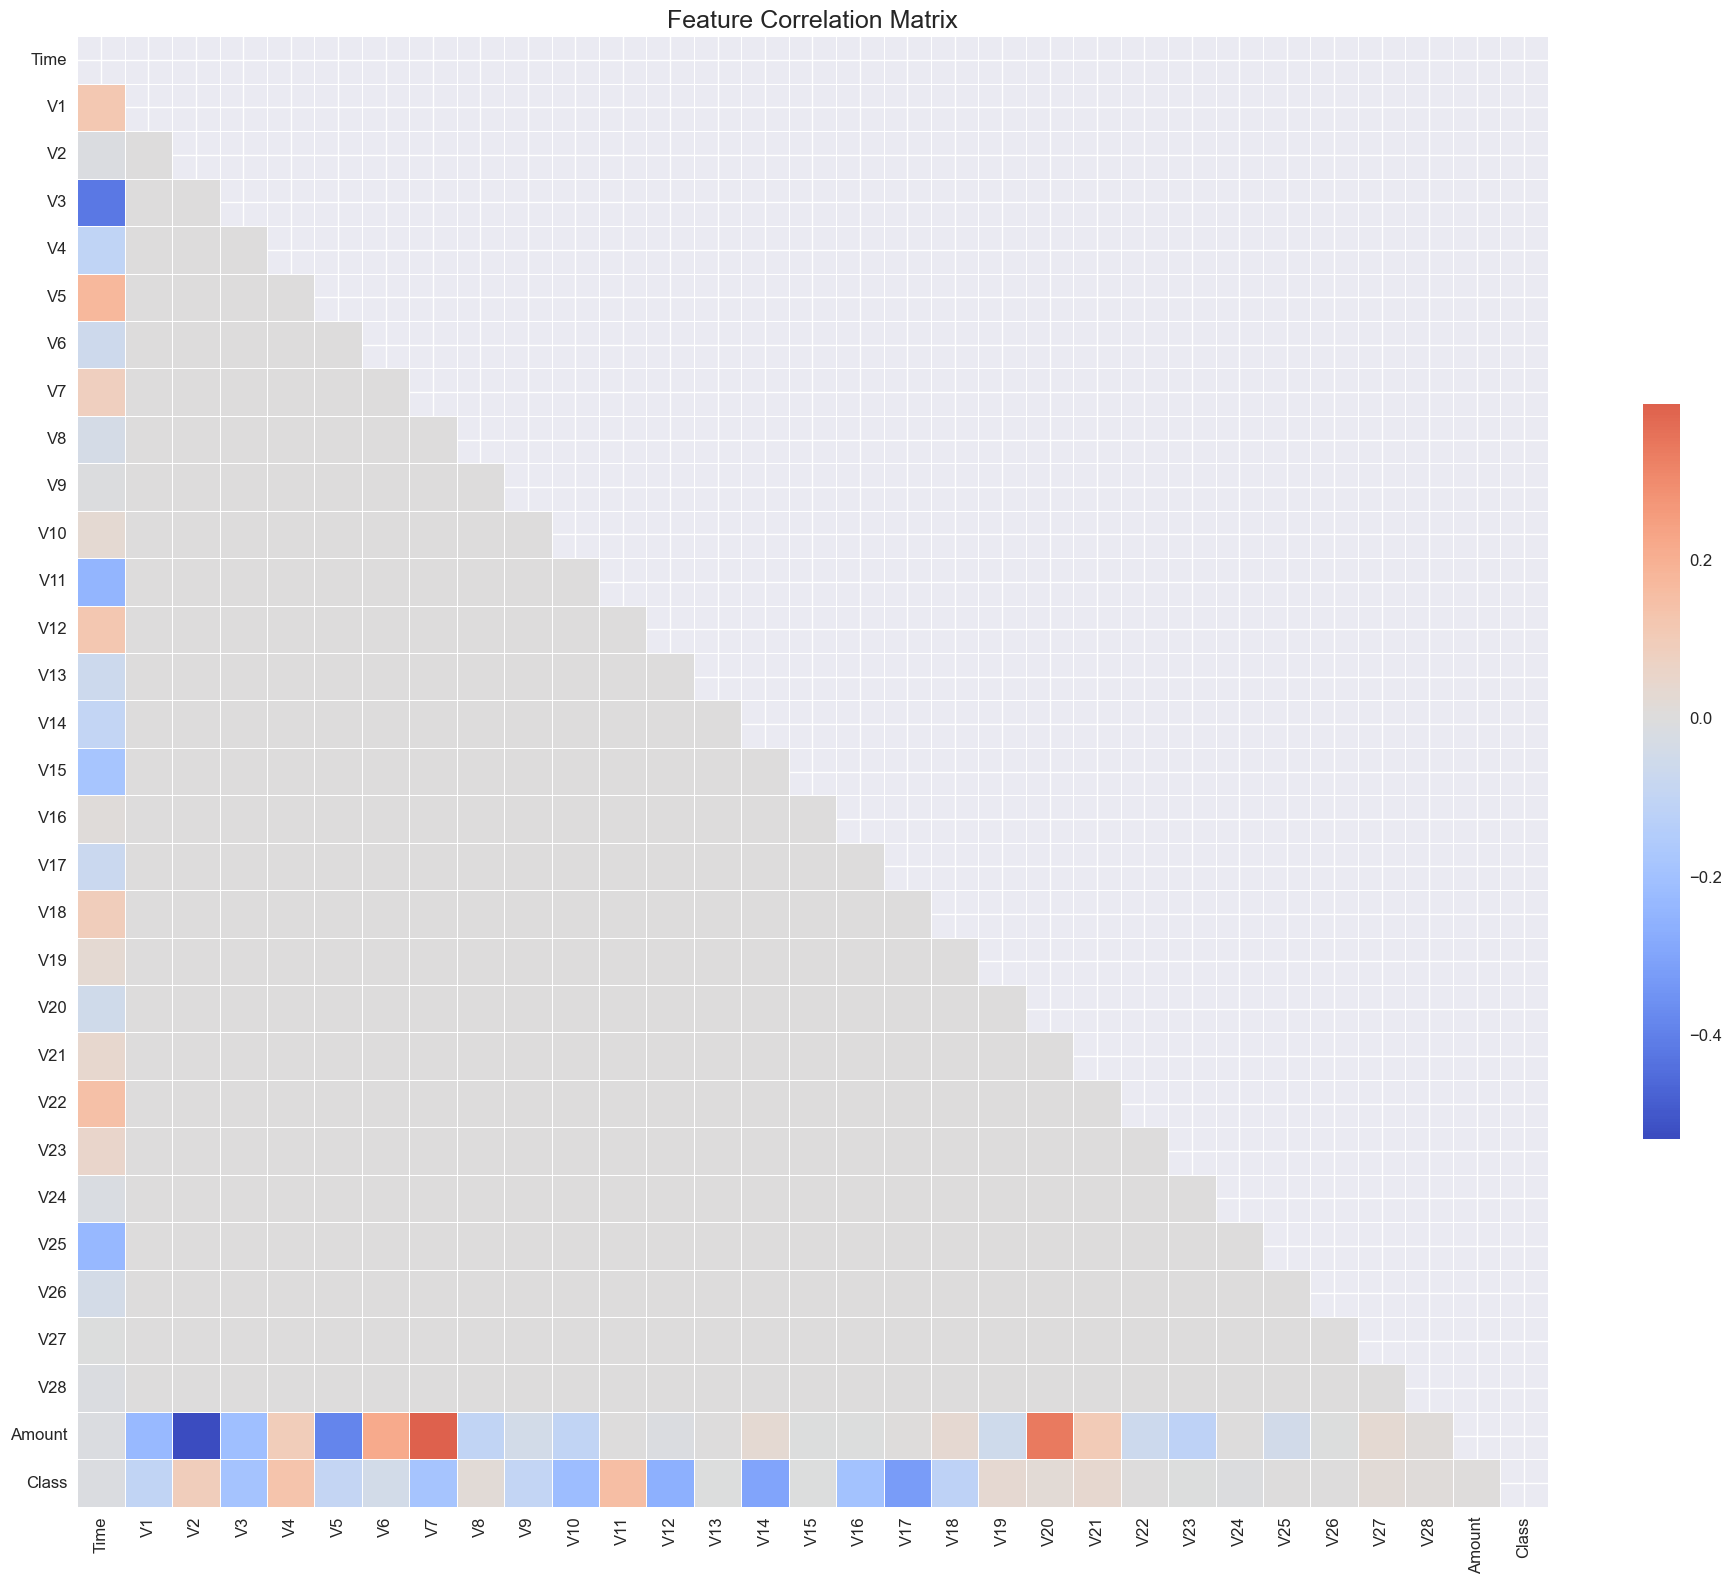

Features most correlated with the target (Class):
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Features most negatively correlated with the target (Class):
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


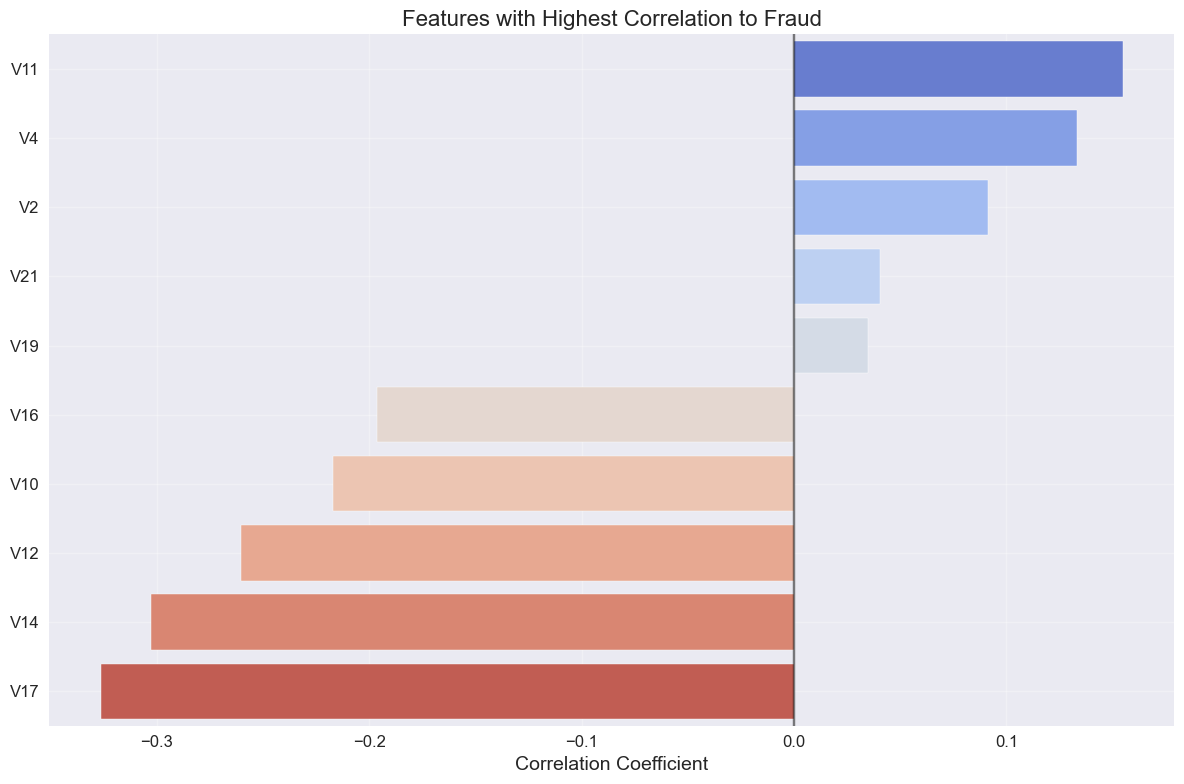

In [31]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Matrix', fontsize=18)
plt.tight_layout()
plt.show()

# Find features most correlated with the target
class_corr = corr_matrix['Class'].sort_values(ascending=False)
print("Features most correlated with the target (Class):")
print(class_corr[1:11])  # Top 10 positively correlated (excluding Class itself)
print("\nFeatures most negatively correlated with the target (Class):")
print(class_corr[-10:])  # Top 10 negatively correlated

# Plot top correlated features
top_positive = class_corr[1:6].index.tolist()  # Top 5 positively correlated
top_negative = class_corr[-5:].index.tolist()  # Top 5 negatively correlated
top_features = top_positive + top_negative

plt.figure(figsize=(12, 8))
sns.barplot(x=class_corr[top_features].values, y=top_features, palette='coolwarm')
plt.title('Features with Highest Correlation to Fraud', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Prepare Data for Preprocessing

Now that we've analyzed the dataset, let's examine if there are any missing values and prepare the data for preprocessing.

In [33]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")

# Check for duplicate transactions
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate transactions: {duplicates:,.0f}")

# Check for outliers in the Amount column
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"\nNumber of outliers in Amount: {len(outliers):,.0f} ({len(outliers) / len(df) * 100:.2f}%)")

# Scale Amount and Time features
# These features have different scales compared to the V features
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled['Amount'] = scaler.fit_transform(df[['Amount']])
df_scaled['Time'] = scaler.fit_transform(df[['Time']])

# Show the first few rows after scaling
print("\nFirst 5 rows after scaling Amount and Time:")
df_scaled.head()

Missing values in each column:
No missing values found

Number of duplicate transactions: 1,081

Number of outliers in Amount: 31,904 (11.20%)

First 5 rows after scaling Amount and Time:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Summary of Findings

1. **Class Imbalance**: The dataset is highly imbalanced with fraudulent transactions making up only a small percentage of the total.
2. **Feature Distributions**: Many of the V features show distinct distributions for fraudulent vs. normal transactions.
3. **Correlations**: Some features show strong correlations with the target variable, which could be useful for model building.
4. **Data Quality**: The dataset appears to be clean with no missing values and minimal preprocessing needed.
5. **Preprocessing Requirements**:
   - Feature scaling for Time and Amount
   - Handling class imbalance using techniques like SMOTE
   - Potential feature selection based on correlation analysis

In the next notebook, we'll focus on model building and evaluation using the insights gained from this exploration.

## Data Preprocessing and Export

Let's prepare the data for modeling by:
1. Scaling features
2. Splitting into train and test sets
3. Saving the processed data for future use

In [38]:
# Import necessary libraries for preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import sys
sys.path.append('..')
from config.config import PROCESSED_DATA_DIR, RANDOM_STATE, TEST_SIZE

# Separate features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set: {X_train.shape[0]:,.0f} samples")
print(f"Testing set: {X_test.shape[0]:,.0f} samples")
print(f"\nClass distribution in training set: {pd.Series(y_train).value_counts()}")
print(f"\nClass distribution in testing set: {pd.Series(y_test).value_counts()}")

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\n\nAfter SMOTE - Training set: {X_train_smote.shape[0]:,.0f} samples")
print(f"\nClass distribution after SMOTE: {pd.Series(y_train_smote).value_counts()}")

# Create directory for saving processed data
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)

# Save the processed datasets
np.save(PROCESSED_DATA_DIR / "X_train.npy", X_train_smote)
np.save(PROCESSED_DATA_DIR / "X_test.npy", X_test)
np.save(PROCESSED_DATA_DIR / "y_train.npy", y_train_smote)
np.save(PROCESSED_DATA_DIR / "y_test.npy", y_test)

# Also save the original (non-SMOTE) training data for comparison in modeling
np.save(PROCESSED_DATA_DIR / "X_train_original.npy", X_train)
np.save(PROCESSED_DATA_DIR / "y_train_original.npy", y_train)

print(f"\n\nProcessed data saved to {PROCESSED_DATA_DIR}")

# Verify saved files
import os
print("\nSaved files:")
for file in os.listdir(PROCESSED_DATA_DIR):
    print(f"- {file}")

Training set: 227,845 samples
Testing set: 56,962 samples

Class distribution in training set: Class
0    227451
1       394
Name: count, dtype: int64

Class distribution in testing set: Class
0    56864
1       98
Name: count, dtype: int64


After SMOTE - Training set: 454,902 samples

Class distribution after SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


Processed data saved to /Users/sebastian/Improvement/ai/fraud_detection_with_machine_learning/notebooks/../data/processed

Saved files:
- y_train_original.npy
- .gitkeep
- README.md
- y_train.npy
- X_train_original.npy
- y_test.npy
- X_test.npy
- X_train.npy


In [42]:
# Load the dataset
# data_path = Path('../data/raw/creditcard.csv')
data_path = RAW_DATA_DIR / 'creditcard.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
